# 5회 Challenge Big Contest 2017
보험, 통신, 신용평가사 (개인정보 비식별)

결합데이터를 활용한 대출상환 예측 알고리즘 개발

In [1]:
# 필요한 모듈 불러오기
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='NanumGothic');
import pandas as pd
import numpy as np
from Csv import user_functions as uf

<br></br>
## 1 RandomForest 를 활용한 주요필드 및 분석
Per_Ordering Data_set

### 01 전체 테이블 상관관계 분석
1. import 데이터를 
2. feacture변환 와 정규화 처리 후 
3. 상관관계 분석

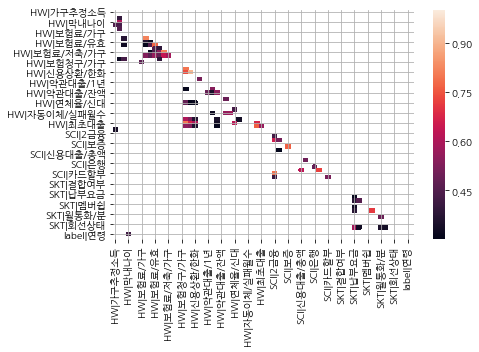

In [2]:
table_ = uf.import_table('./Csv')
err = uf.detect_factors(table_, show = False) # 문자 feacture 들을 숫자로 변환
err_map, table_ = uf.pre_ordering(table_, [er[0] for er in err])
table_ = uf.table_stand(table_)  # 정규화 전처리
uf.corr_heatmap(table_, 0.3)     # 상관관계를 Heat Map으로 출력

In [3]:
# 상관관계 높은 순서대로 표로 출력
uf.corr_list(table_, under_limit=0.1)[:15]

,factor1,factor2,corr
0,HW|신용대출/한화,HW|신용상환/한화,0.902
1,HW|보험료/보장,HW|보험료/보장/가구,0.820
2,HW|보험료/저축,HW|보험료/저축/가구,0.811
3,HW|신용대출,HW|최초대출,0.801
4,HW|신용대출,HW|신용대출/한화,0.796
5,SCI|2금융,SCI|카드할부,0.792
6,HW|보험료/유효,HW|보험료/유효/가구,0.773
7,SCI|보증,SCI|보증/총액,0.766
8,HW|최근등급,HW|최초등급,0.763
9,HW|신용대출,HW|신용상환/한화,0.739


In [4]:
# 분석결과
# 전체 상관성 수치결과, 같은 카테고리끼리 묶인 자료가 대부분이다
# 상관성이 0.3 이상의 요인들을 Heat Map으로 시각화한 결과
# 총 4개의 Map이 물리적으로 묶인 듯 보인다
# 결합데이터 간의 직접적 유기 연관도 낮다

### 02 한화생명 상관관계 분석
한화생명, SKT, SCI 구분하여 내용 살펴보기
#### 1) 상관관계 분석
한화생명

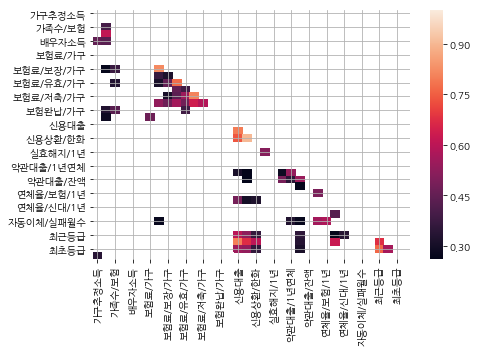

In [5]:
table = uf.import_table('./Csv', top_columns=True)
table_target = table['label'].ix[:,-1]
table_hw = table['HW']

err = uf.detect_factors(table_hw, show=False)
err_cols = [er[0] for er in err]
cols_map_hw , table_hw = uf.pre_ordering(table_hw, err_cols)
uf.corr_heatmap(table_hw, 0.25)

#### 2) Random Forest 요인 분석
table_target : 연체여부 판단

In [6]:
uf.corr_list(table_hw, under_limit=0.1)[:5]

,factor1,factor2,corr
0,신용대출/한화,신용상환/한화,0.902
1,보험료/보장,보험료/보장/가구,0.820
2,보험료/저축,보험료/저축/가구,0.811
3,신용대출,최초대출,0.801
4,신용대출,신용대출/한화,0.796


Accuracy on training set: 0.958
Accuracy on test set    : 0.956


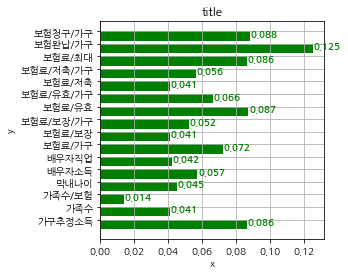

In [7]:
# 한화 전체 중 왼쪽 사각형
uf.tree_plot_gradient(table_hw.ix[:,:16], table_target, figsize=(4,4))

Accuracy on training set: 0.958
Accuracy on test set    : 0.956


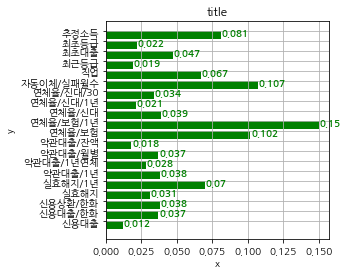

In [8]:
# 한화 전체 중 왼쪽 사각형
uf.tree_plot_gradient(table_hw.ix[:,16:], table_target, figsize=(4,4))

Accuracy on training set: 0.958
Accuracy on test set    : 0.956


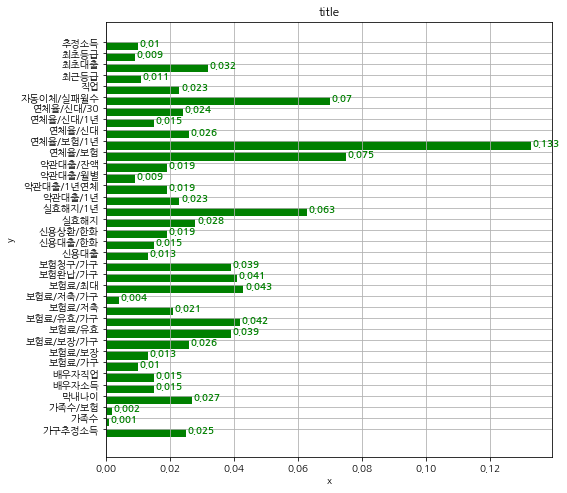

In [9]:
uf.tree_plot_gradient(table_hw, table_target)

In [10]:
# 모델분석결과 주요필드
# 보험완납/가구
# 연체율/보험/1년, 연체율/보험, 자동이체/실패월수, 실효해지/1년

### 02 SKT  상관관계 분석
한화생명, SKT, SCI 구분하여 내용 살펴보기
#### 1) 상관관계 분석
SKT

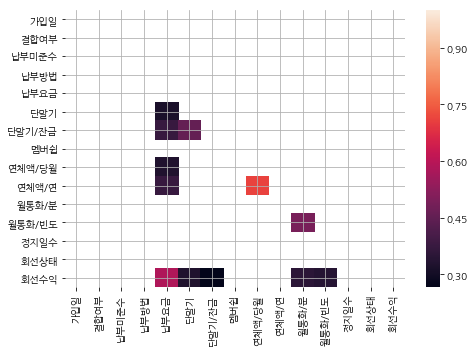

In [11]:
table_skt = table['SKT']
err = uf.detect_factors(table_skt, show=False)
err_cols = [er[0] for er in err]
cols_map_skt , table_skt = uf.pre_ordering(table_skt, err_cols)
uf.corr_heatmap(table_skt, 0.25)

#### 2) Random Forest 요인 분석
table_target : 연체여부 판단

In [12]:
uf.corr_list(table_skt, under_limit=0.1)[:5]

,factor1,factor2,corr
0,연체액/당월,연체액/연,0.712
1,납부요금,회선수익,0.583
2,월통화/분,월통화/빈도,0.490
3,단말기,단말기/잔금,0.455
4,납부요금,단말기/잔금,0.373


Accuracy on training set: 0.959
Accuracy on test set    : 0.957


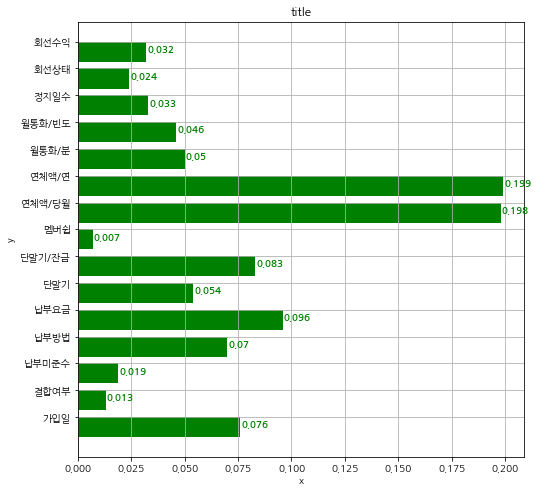

In [13]:
# 한화 전체 중 왼쪽 사각형
uf.tree_plot_gradient(table_skt, table_target)

In [14]:
# 모델분석결과 주요필드
# 연체액/연, 연체액/당월

### 03 SCI  상관관계 분석
한화생명, SKT, SCI 구분하여 내용 살펴보기
#### 1) 상관관계 분석
SCI

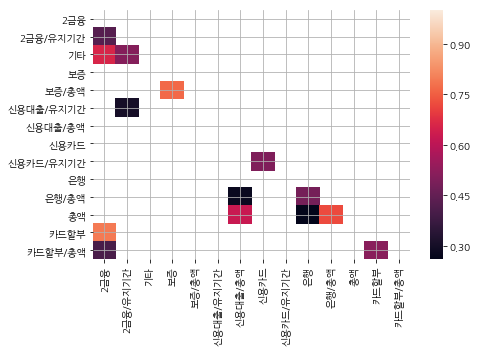

In [15]:
table_sci = table['SCI']
err = uf.detect_factors(table_sci, show=False)
err_cols = [er[0] for er in err]
cols_map_sci , table_sci = uf.pre_ordering(table_sci, err_cols)
uf.corr_heatmap(table_sci, 0.25)

#### 2) Random Forest 요인 분석
table_target : 연체여부 판단

In [16]:
uf.corr_list(table_sci, under_limit=0.1)[:5]

,factor1,factor2,corr
0,2금융,카드할부,0.792
1,보증,보증/총액,0.766
2,은행/총액,총액,0.721
3,2금융,기타,0.656
4,신용대출/총액,총액,0.626


Accuracy on training set: 0.960
Accuracy on test set    : 0.958


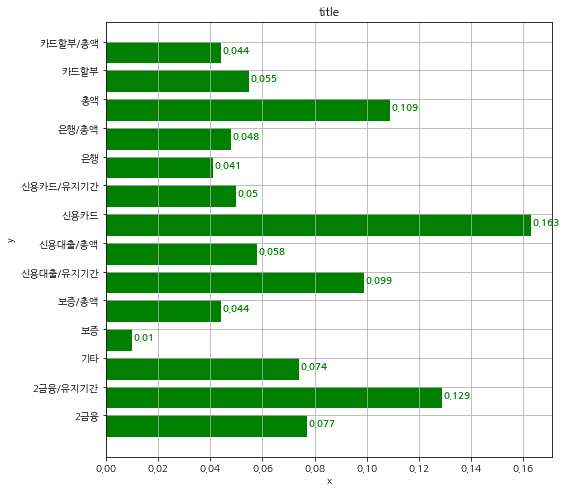

In [17]:
# 한화 전체 중 왼쪽 사각형
uf.tree_plot_gradient(table_sci, table_target)

In [18]:
# 모델분석결과 주요필드 정리
# 한화 : 보험완납/가구, 연체율/보험/1년, 연체율/보험, 자동이체/실패월수, 실효해지/1년
# SKT : 연체액/연, 연체액/당월
# SCI : 신용카드, 신용대출/유지기간, 2금융/유지기간, 총액

<br></br>
## 2 빈도 분석을 활용한 주요 필드 확장
Per_Ordering Data_set
### 01 전체 테이블 빈도분석

In [19]:
table_ = uf.import_table('./Csv')
table_good = table_[table_.ix[:,-1] == 0]
table_mal  = table_[table_.ix[:,-1] == 1]
table_good_keys, table_good_values = uf.value_count_data(table_good)
table_mal_keys,  table_mal_values  = uf.value_count_data(table_mal)

In [20]:
def value_count_plot(data_keys_good, data_values_good, data_keys_bed, data_values_bed, col):
    # 빈도 1순위 데이터 비교 :  x_1, y_1 유효데이터
    x_1 = data_keys_good.columns
    y_1 = data_values_good.ix[col,:].fillna(data_values_good.median())
    label_1 = data_keys_good.ix[col,:].tolist()
    x = data_keys_bed.columns
    y = data_values_bed.ix[col,:].fillna(data_values_bed.median())
    label = data_keys_bed.ix[col,:].tolist()
    return uf.value_count_plots(x_1, y_1, label_1, x, y ,label)

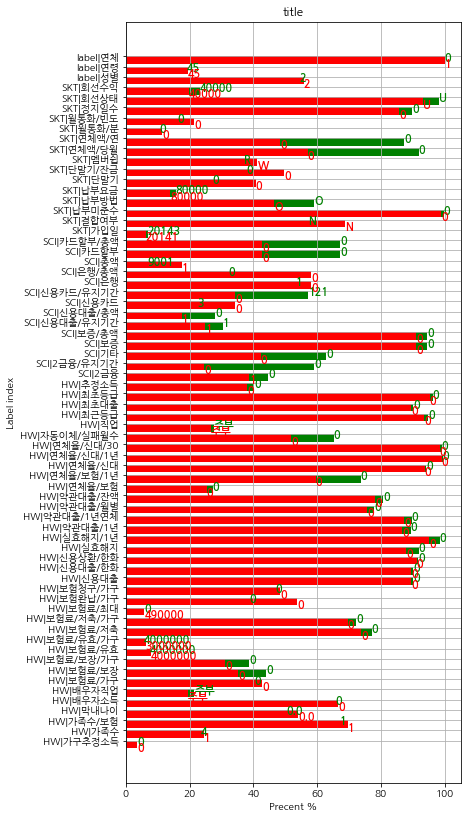

In [21]:
# 1순위 빈도를 갖는 데이터 출력
# 0 을 제일 많은 빈도로 갖는 데이터가 다수이다
# green : 비연체자 , red : 연체자
value_count_plot(table_good_keys, table_good_values, table_mal_keys, table_mal_values, 0)

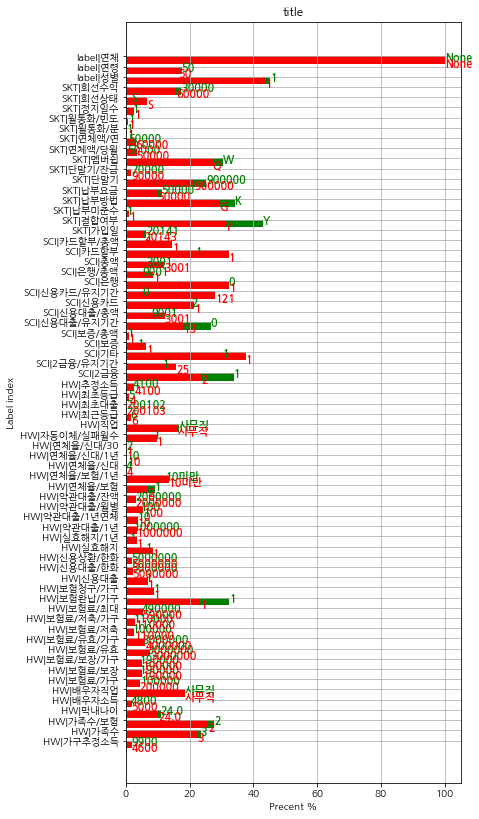

In [22]:
# 2순위 데이터 내용을 출력,
# 변별력은 있지만 출현 빈도가 무척 낮음
value_count_plot(table_good_keys, table_good_values, table_mal_keys, table_mal_values, 1)

### 02 전체 테이블 빈도분석
표로 정리하여 구분해보기

In [23]:
#[(i,col)  for i, col in enumerate(data_keys_good.columns)]
# 함수와 매개변수들을 쉽게 사용하도록 묶은 함수로 옮기지 마시오!!
def value_table_slice_merge(table_bed, table_good, slice_cols):
    df_1 = uf.value_table(table_bed).ix[:, slice_cols]
    df_2 = uf.value_table(table_good).ix[:, slice_cols]
    chain_cols = []
    for i in range(len(df_1.columns)):
        chain_cols.append(df_1.ix[:,i])
        chain_cols.append(df_2.ix[:,i])
    df_merge = pd.DataFrame(chain_cols)
    df_merge.columns=['빈도1', '빈도2', '빈도3', '빈도4', '빈도5']
    return df_merge

In [24]:
# 빈도중 SKT 주요 컬럼내용 비교
# (왼쪽 비연체자 빈도, 오른쪽 연체자 빈도)
value_table_slice_merge(table_good, table_mal,[53,56,57]).T

,SKT|납부방법,SKT|납부방법,SKT|단말기/잔금,SKT|단말기/잔금,SKT|멤버쉽,SKT|멤버쉽
빈도1,"(O, 58.98)","(O, 46.44)","(0, 37.96)","(0, 49.73)","(R, 37.06)","(W, 41.27)"
빈도2,"(K, 34.09)","(G, 29.41)","(70000, 1.74)","(90000, 1.68)","(W, 30.35)","(Q, 27.28)"
빈도3,"(G, 3.55)","(K, 13.87)","(90000, 1.7)","(60000, 1.63)","(Q, 25.07)","(R, 26.45)"
빈도4,"(R, 3.38)","(R, 10.28)","(100000, 1.69)","(110000, 1.47)","(E, 7.52)","(E, 5.0)"
빈도5,"(None, nan)","(None, nan)","(80000, 1.69)","(80000, 1.47)","(None, nan)","(None, nan)"


In [25]:
# 빈도중 HW 주요 컬럼내용 비교
value_table_slice_merge(table_good, table_mal,[17,18,25,27,28]).T

,HW|신용대출/한화,HW|신용대출/한화,HW|신용상환/한화,HW|신용상환/한화,HW|연체율/보험,HW|연체율/보험,HW|연체율/신대,HW|연체율/신대,HW|연체율/신대/1년,HW|연체율/신대/1년
빈도1,"(0, 90.22)","(0, 89.5)","(0, 91.61)","(0, 91.25)","(0, 27.25)","(0, 25.38)","(0, 94.19)","(0, 93.7)","(0, 99.42)","(0, 99.02)"
빈도2,"(5000000, 2.03)","(5000000, 2.31)","(5000000, 1.78)","(5000000, 1.94)","(1, 9.17)","(2, 7.02)","(4, 0.12)","(4, 0.21)","(10, 0.23)","(10, 0.44)"
빈도3,"(4000000, 0.86)","(10000000, 1.07)","(4000000, 0.87)","(10000000, 0.77)","(2, 9.04)","(1, 6.81)","(2, 0.12)","(3, 0.21)","(20, 0.1)","(40, 0.14)"
빈도4,"(10000000, 0.83)","(4000000, 0.86)","(3000000, 0.77)","(3000000, 0.77)","(3, 6.41)","(3, 5.02)","(3, 0.11)","(31, 0.19)","(40, 0.06)","(20, 0.12)"
빈도5,"(3000000, 0.71)","(3000000, 0.61)","(10000000, 0.63)","(4000000, 0.75)","(4, 5.33)","(4, 4.81)","(32, 0.11)","(55, 0.16)","(30, 0.06)","(100, 0.09)"


In [26]:
# SCI 빈도 데이터 slicing 
value_table_slice_merge(table_good, table_mal, [36,40,41,42,43,47]).T

,SCI|2금융,SCI|2금융,SCI|보증/총액,SCI|보증/총액,SCI|신용대출/유지기간,SCI|신용대출/유지기간,SCI|신용대출/총액,SCI|신용대출/총액,SCI|신용카드,SCI|신용카드,SCI|총액,SCI|총액
빈도1,"(0, 44.6)","(1, 38.65)","(0, 94.55)","(0, 90.97)","(1, 30.32)","(1, 24.94)","(0, 27.98)","(1, 17.54)","(3, 22.48)","(0, 34.31)","(9001, 6.91)","(1, 17.47)"
빈도2,"(1, 33.92)","(2, 23.77)","(1, 0.58)","(1, 0.98)","(0, 26.6)","(13, 18.26)","(9001, 7.96)","(3001, 12.2)","(2, 20.6)","(1, 21.41)","(3001, 6.3)","(3001, 12.11)"
빈도3,"(2, 12.21)","(3, 13.48)","(980001, 0.45)","(9001, 0.79)","(13, 14.12)","(25, 13.93)","(3001, 7.27)","(0, 11.83)","(4, 17.67)","(2, 18.59)","(18001, 5.34)","(6001, 9.24)"
빈도4,"(3, 5.53)","(0, 12.11)","(9001, 0.44)","(3001, 0.72)","(25, 9.4)","(0, 12.55)","(18001, 5.84)","(6001, 9.68)","(1, 12.77)","(3, 12.08)","(1, 5.12)","(9001, 8.58)"
빈도5,"(4, 2.53)","(4, 7.79)","(18001, 0.34)","(980001, 0.63)","(37, 5.14)","(37, 9.77)","(1, 5.71)","(9001, 8.65)","(5, 10.94)","(4, 7.51)","(6001, 4.6)","(12001, 6.51)"


In [27]:
# 정리 (빈도 구별로 판단한 식별력 높은 컬럼)
# SKT|맴버십
# SCI|2금융,  SCI|신용대출/유지기간,  SCI|신용대출/총액,  SCI|신용카드,  SCI|총액
# HW는 0이 너무 많음

<br></br>
## 3 데이터 모델링 전처리
Perceptron, Multilinear etc..
### 01 전체 테이블 모델링 위한 전처리
1. feacture
2. train/ test
3. Scaleset Data

In [28]:
# table = uf.import_table('./Csv')
# 데이터 전처리 : 숫자가 아닌 데이터들을 솟수 데이터로 변환
err = uf.detect_factors(table, show = False)
err_map, table = uf.pre_ordering(table, [er[0] for er in err])

# df_temp 원본 데이터에서 전처리
table = table.replace('*', 0)
table = table.fillna(0)  # .fillna(df_org.median() : 평균

In [29]:
# 원본의 비연체자/ 연체자 데이터 (통으로 분석)
df_good_x = table[table.ix[:,-1] == 0].ix[:,:-1]
df_good_y = table[table.ix[:,-1] == 0].ix[:,-1]
df_mal_x  = table[table.ix[:,-1] == 1].ix[:,:-1]
df_mal_y  = table[table.ix[:,-1] == 1].ix[:,-1]

In [30]:
# 연체자/ 비연체자를 구분하여 Train/ Test 생성
test_size = 0.2
from sklearn.model_selection import train_test_split

# 비연체자 자료 분할
df_good_train_x, df_good_test_x, df_good_train_y, df_good_test_y = train_test_split(\
    df_good_x, df_good_y, random_state=0, test_size=test_size)

# 연체자 자료 분할
df_mal_train_x, df_mal_test_x, df_mal_train_y, df_mal_test_y = train_test_split(\
    df_mal_x, df_mal_y, random_state=0, test_size=test_size)

df_train_x = pd.concat([df_mal_train_x, df_good_train_x], axis = 0)
df_train_y = pd.concat([df_mal_train_y, df_good_train_y], axis = 0)
df_test_x = pd.concat([df_mal_test_x, df_good_test_x], axis = 0)
df_test_y = pd.concat([df_mal_test_y, df_good_test_y], axis = 0)
df_train_y.value_counts()[1]/df_train_y.value_counts()[0]*100

4.4674031997498567

In [31]:
# 테이블 학습위한 정규화 작업  cf) normal=True : 옵션은 인식률이 0이 되더라
df_train_x = uf.table_stand(df_train_x)
df_test_x = uf.table_stand(df_test_x) 

### 02 위의 분석을 기반으로 Table 필드 추출하기
컬럼 추출하기

In [32]:
# RandomForest로 추출한 특징컬럼 리스트
cols_hw  = [6,9,25,26,30]#[1,0,6,9,25,26,30] 
cols_skt = [58,59,61] 
cols_sci = [36,40,41,42,43,47] 
cols_ = cols_hw + cols_skt + cols_sci
cols_

[6, 9, 25, 26, 30, 58, 59, 61, 36, 40, 41, 42, 43, 47]

In [33]:
# 빈도로 임의로 추출 (그런데 효과성은 낮다)
# cols_hw = [17,18,25,27,28] 
# cols_skt = [53,56,57]
# cols_sci = [36,40,41,42,43,47]
# cols_ = cols_hw + cols_skt + cols_sci

In [34]:
# 데이터의 내용이 다양하게 추출됨 
# (일반화 보다 고도화된 모델이 유용)
df_train_x.ix[:,cols_].sum(axis=1).value_counts().iloc[:5]

-2.857363    2
-6.019871    2
-5.949003    2
-5.932151    2
-2.963767    2
dtype: int64

In [35]:
# DataFrame to Series (by slicing columns)
def np_tensor_data(df_train, df_test, df_train_y, df_test_y, cols):
    df_train = df_train.ix[:, cols ]
    df_test  = df_test.ix[: , cols ]
    x_train = np.array(df_train, dtype=np.float32)  # array 타입으로 변환
    y_train = np.array(df_train_y.values, dtype=np.float32)
    x_test  = np.array(df_test,  dtype=np.float32)
    y_test  = np.array(df_test_y.values ,  dtype=np.float32)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = np_tensor_data(
    df_train_x, df_test_x, df_train_y, df_test_y, cols_)

<br></br>
## 4 Perceptron 모델링 만들기
sklearn

Hidden Layer 를 활용한 신경망 모델 생성

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import  classification_report

In [37]:
#  Hidden Layer 200 일때, 모델이 더 안정적이다
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[50]).fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set    : {:.2f}".format(mlp.score(x_test, y_test)))
print(classification_report(y_test, mlp.predict(x_test)))

Accuracy on training set: 0.96
Accuracy on test set    : 0.96
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98     19190
        1.0       0.52      0.16      0.24       858

avg / total       0.94      0.96      0.95     20048



In [38]:
# Default Hidden Layer 가 100으로 설정시, 10 등에 비해서 효과가 좋다
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set    : {:.2f}".format(mlp.score(x_test, y_test)))
print(classification_report(y_test, mlp.predict(x_test)))

Accuracy on training set: 0.96
Accuracy on test set    : 0.96
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98     19190
        1.0       0.46      0.17      0.25       858

avg / total       0.94      0.96      0.95     20048



<br></br>
## 5 Pytorch 로 모델링 만들기
by Pytorch

### 01 Linear Regression  
by Pytorch

In [39]:
def pytorch_linear(x_train, x_test, y_train, y_test):
    import torch
    from torch.autograd import Variable
    import numpy as np
    torch.manual_seed(777)
    # torch 데이터 포맷으로 변환
    X = Variable(torch.from_numpy(x_train))
    Y = Variable(torch.from_numpy(y_train))
    # Hypothesis using sigmoid
    linear = torch.nn.Linear( x_train.shape[1], 1, bias=True)
    sigmoid = torch.nn.Sigmoid()
    model = torch.nn.Sequential(linear, sigmoid)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    for step in range(2001):
        optimizer.zero_grad()
        hypothesis = model(X)
        cost = -(Y * torch.log(hypothesis) + (1 - Y)
                 * torch.log(1 - hypothesis)).mean()
        cost.backward()
        optimizer.step()
        if step % 200 == 0: print(step, cost.data.numpy())

    # torch 데이터 포맷으로 변환
    X_test = Variable(torch.from_numpy(x_test))
    Y_test = Variable(torch.from_numpy(y_test))
    predicted = (model(X_test).data > 0.5).float()
    accuracy = (predicted == Y_test.data).float().mean()

    from sklearn.metrics import  classification_report
    print(classification_report(y_test, predicted.numpy())) # Accuracy computation
    return linear.weight.data.numpy(), model

In [40]:
array, model = pytorch_linear(x_train, x_test, y_train, y_test)
#model

0 [ 0.80689716]
200 [ 0.4540889]
400 [ 0.31953749]
600 [ 0.25695106]
800 [ 0.22274591]
1000 [ 0.20185564]
1200 [ 0.18804349]
1400 [ 0.17835385]
1600 [ 0.17123799]
1800 [ 0.16581888]
2000 [ 0.16156852]
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98     19190
        1.0       0.38      0.02      0.04       858

avg / total       0.93      0.96      0.94     20048



### 03 RNN (lstm 모델링)
by Pytorch

In [41]:
# train Parameters
learning_rate = 0.01
num_epochs = 200
input_size = x_train.shape[1]
hidden_size = 5
num_classes = 1
timesteps = seq_length = 7
num_layers = 1  # number of layers in RNN

In [42]:
# import modules
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import os
torch.manual_seed(777)  # reproducibility

In [43]:
if "DISPLAY" not in os.environ:
    matplotlib.use('Agg') # remove Travis CI Error

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [44]:
def stock_predict_rnn(x_train, y_train):
    %matplotlib inline
    import pandas as pd; from time import time; t0 = time()
    x, y = x_train, y_train
    dataX, dataY = [], []
    for i in range(0, len(y) - seq_length):
        _x = x[i:i + seq_length]
        _y = y[i + seq_length]  # Next close price
        dataX.append(_x)
        dataY.append(_y)
        if i % 150 == 0:
            print(_x[0], "->", _y)
    # train/test data setting
    train_size = int(len(dataY) * 0.7)
    test_size = len(dataY) - train_size
    trainX = torch.Tensor(np.array(dataX[0:train_size]))
    trainX = Variable(trainX)
    testX = torch.Tensor(np.array(dataX[train_size:len(dataX)]))
    testX = Variable(testX)
    trainY = torch.Tensor(np.array(dataY[0:train_size]))
    trainY = Variable(trainY)
    testY = torch.Tensor(np.array(dataY[train_size:len(dataY)]))
    testY = Variable(testY)

    class LSTM(nn.Module):
        def __init__(self, num_classes, input_size, hidden_size, num_layers):
            super(LSTM, self).__init__()
            self.num_classes = num_classes
            self.num_layers = num_layers
            self.input_size = input_size
            self.hidden_size = hidden_size
            self.seq_length = seq_length
            # Set parameters for RNN block
            self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                                num_layers=num_layers, batch_first=True)
            # Fully connected layer
            self.fc = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            # Initialize hidden and cell states
            h_0 = Variable(torch.zeros(
                self.num_layers, x.size(0), self.hidden_size))
            c_0 = Variable(torch.zeros(
                self.num_layers, x.size(0), self.hidden_size))
            # Propagate input through LSTM
            _, (h_out, _) = self.lstm(x, (h_0, c_0))
            h_out = h_out.view(-1, self.hidden_size)
            out = self.fc(h_out)
            return out

    # RNN model의 초기화
    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
    # Set loss and optimizer function
    criterion = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        optimizer.zero_grad()
        # obtain the loss function
        loss = criterion(outputs, trainY)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.data[0]))
    print("Learning finished!")
    print(int(time()-t0)//60, 'min', int(time()-t0)%60, 'sec')

    # Test the model
    print(lstm.eval())
    test_predict = lstm(testX)
    print(test_predict)
    return lstm, criterion

In [45]:
lstm, criterion = stock_predict_rnn(x_train, y_train)

[-0.05104454 -0.37568459 -0.67360443 -0.36867473 -0.39281869  2.09640265
  1.29498839  0.11595871  0.0398123  -0.11727911  0.6510306  -0.29112032
 -0.05042602 -0.58742672] -> 1.0
[-0.2765218  -0.39821154 -0.67360443 -0.36867473 -0.39281869 -0.23204929
  5.14657545 -1.00390124  0.0398123   0.07387637  1.06416702 -0.39933497
 -1.69053304 -0.65810949] -> 1.0
[-0.2765218  -0.28557688  3.86896253  5.75350046  4.0969882   1.03801548
  0.72438294  0.76180387 -0.83552337 -0.11727911  1.4773035  -0.11076261
 -1.14383078 -0.46962219] -> 1.0
[-0.0920404   0.61550021 -0.16887479 -0.00854678  0.33134368  0.82633799
  1.15233707 -0.74319309 -0.83552337 -0.11727911 -0.62280679 -0.39934698
 -1.69053304  0.96759331] -> 1.0
[-0.13303627 -0.24052303 -0.337118   -0.00854678 -0.39281869 -0.23204929
 -0.27417672 -0.19807608  0.91514796 -0.04080927 -0.58837873 -0.32719186
 -0.59712839 -0.56386584] -> 1.0
[-0.2765218  -0.33063075  2.18653035 -0.36867473 -0.39281869 -0.23204929
 -0.27417672  0.54257202  0.9151

  0.49627635  3.69280529] -> 0.0
[-0.25602385 -0.24052303 -0.67360443 -0.36867473 -0.39281869 -0.23204929
 -0.27417672  0.7084772  -0.83552337 -0.11727911 -0.62280679 -0.39934698
 -0.05042602  0.37857056] -> 0.0
[-0.22186063 -0.28557688  0.33585489 -0.36867473 -0.39281869 -0.23204929
 -0.27417672 -0.99797601 -0.83552337 -0.11727911  3.54298568 -0.39934698
  1.04297864 -0.11620855] -> 0.0
[ 0.03777983  0.54791945  0.25173327  0.71170914  0.91067362 -0.23204929
 -0.27417672 -0.45878422  1.79048359 -0.11727911 -0.17524229 -0.11076261
 -0.05042602 -0.37537855] -> 0.0
[-0.24919121 -0.28557688 -0.08475317 -0.36867473 -0.39281869 -0.23204929
 -0.27417672 -0.47655976  0.0398123  -0.11727911 -0.62280679 -0.39934698
 -0.59712839 -0.44606128] -> 0.0
[-0.11937098 -0.08283453 -0.67360443 -0.36867473 -0.39281869 -0.23204929
 -0.27417672 -0.99797601  0.0398123  -0.11727911  3.1298492  -0.36326343
 -1.14383078 -0.63454854] -> 0.0
[-0.22869328 -0.1278884   1.09294939  0.71170914  1.63483596 -0.23204929

[-0.18769743  0.27759632  0.84058458 -0.00854678 -0.10315374 -0.23204929
 -0.27417672 -1.00390124  0.0398123  -0.11727911 -0.17524229 -0.32719186
 -0.59712839 -0.61098766] -> 0.0
[-0.2765218  -0.35315767 -0.16887479  0.71170914 -0.24798623 -0.23204929
 -0.27417672  0.05670687  0.0398123  -0.11727911 -0.58837873  0.0695951
  0.49627635 -0.35181764] -> 0.0
[-0.01688132  1.76437354  0.67234135 -0.00854678  0.91067362 -0.23204929
 -0.27417672 -1.00390124  0.91514796 -0.11727911 -0.58837873 -0.32719186
  2.68308568 -0.61098766] -> 0.0
[ 0.89186031  0.88582337 -0.58948284 -0.36867473 -0.39281869 -0.23204929
 -0.27417672  0.55442238 -0.83552337 -0.11727911  1.06416702 -0.39934698
 -0.59712839 -0.11620855] -> 0.0
[-0.2765218  -0.28557688 -0.67360443 -0.36867473 -0.39281869 -0.23204929
 -0.27417672 -1.00390124  0.91514796 -0.11727911 -0.17524229  1.51245677
 -0.59712839  0.59061873] -> 0.0
[-0.22186063 -0.37568459 -0.67360443 -0.36867473 -0.39281869 -0.23204929
 -0.27417672 -0.86762196 -0.83552

Epoch: 0, loss: 0.06978
Epoch: 50, loss: 0.00745
Epoch: 100, loss: 0.00437
Epoch: 150, loss: 0.00367
Learning finished!
2 min 29 sec
LSTM (
  (lstm): LSTM(14, 5, batch_first=True)
  (fc): Linear (5 -> 1)
)
Variable containing:
-2.6328e-03
-9.8315e-04
-3.1762e-03
     ⋮      
 1.4202e-02
-1.4952e-03
-8.2966e-03
[torch.FloatTensor of size 24054x1]



In [46]:
x_test

array([[ -2.81141788e-01,  -3.84196401e-01,   9.98008370e-01, ...,
         -4.01075482e-01,  -1.14353454e+00,  -5.92853367e-01],
       [  1.81467211e+00,   3.25419962e-01,  -8.51438865e-02, ...,
         -1.10773422e-01,  -1.14353454e+00,  -4.75876629e-01],
       [  9.87561643e-01,   3.03916425e-01,   2.83103514e+00, ...,
         -4.01063383e-01,  -1.69003224e+00,  -6.63039446e-01],
       ..., 
       [ -2.81141788e-01,  -4.27203447e-01,  -1.82448211e-03, ...,
         -4.01075482e-01,   4.95958716e-01,  -5.47603071e-02],
       [ -2.60113567e-01,  -3.19685817e-01,  -5.01740932e-01, ...,
         -4.01075482e-01,  -5.97036779e-01,  -6.39644086e-01],
       [  1.33803213e+00,  -1.47657618e-01,  -5.01740932e-01, ...,
         -2.55918413e-01,  -5.97036779e-01,  -4.52481270e-01]], dtype=float32)

In [47]:
lstm.train(x_test)

LSTM (
  (lstm): LSTM(14, 5, batch_first=True)
  (fc): Linear (5 -> 1)
)